# Toy Language
To illustrate our problem we will create a toy language made of the following characters, /, --, \, which will mean "UP","STAY","DOWN", each character might have 10 data points, and the messages (or uterances if you want to sound smart) will have 10 characters. 

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import random
import pickle

# Simple lamda to return 
rand_char = lambda: random.randint(1,3)
msg_len = 15
data_size = 400

In [8]:
def do_char(char, lst_val, N=10):
    last_val = lst_val[-1]
    curr_val = last_val
    if char == 1:
        # Up
        inc = 1
    elif char == 2:
        # Down
        inc = -1
    elif char == 3:
        # Stay
        inc = 0
    for i in range(N):
        curr_val += inc
        lst_val.append(curr_val)
        
def create_msg(msg_len):
    signal_input = [0.0]
    label = [rand_char() for _ in range(msg_len)]
    [do_char(char, signal_input) for char in label];
    return signal_input, label

def val_to_str(label):
    lst_str = []
    for char in label:
        if char == 1:
            lst_str.append('UP')
        elif char == 2:
            lst_str.append('DOWN')
        elif char == 3:
            lst_str.append('STAY')
    return lst_str

In [9]:
signal_input, label = create_msg(msg_len)
label_string = val_to_str(label)
print(label_string)

['DOWN', 'DOWN', 'STAY', 'UP', 'STAY', 'STAY', 'UP', 'UP', 'DOWN', 'DOWN', 'STAY', 'UP', 'STAY', 'STAY', 'UP']


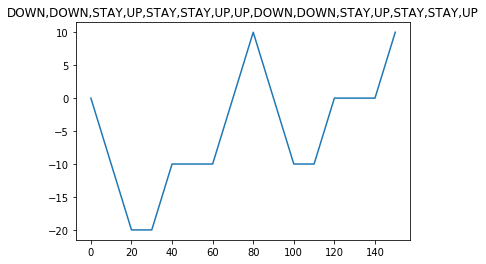

In [10]:
plt.plot(signal_input)
plt.title(','.join(label_string));

#### Create Dataset

In [11]:
dataset = []
for i in range(data_size):
    signal_input, label = create_msg(msg_len)
    dataset.append((np.array(signal_input), np.array(label)))

#### Save Dataset to Pickle

In [12]:
with open('dataset.pkl', 'wb') as f:
    pickle.dump(dataset, f)